In [1]:
from candle.engine import Scalar, Vector
import candle.nn as nn
import candle.losses as losses
import candle.helpers as helpers

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Vector([Scalar(data=0.1, label=x0), Scalar(data=0.2, label=x1), Scalar(data=0.3, label=x2)])


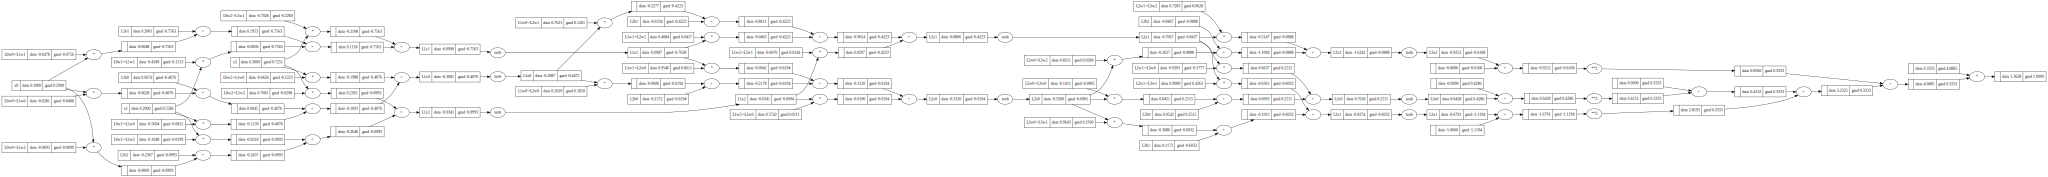

In [4]:
mlp = nn.MLP(3, [3, 2, 3])
x0 = [0.1, 0.2, 0.3]
x = Vector(x0, label="x")
print(x)
y = [0.0, 1.0, 0.0]
y_preds = mlp(x)

loss = losses.mean_squared_error(y_preds, y)
loss.backward()
helpers.draw_dot(loss)


In [4]:
#print(mlp.layers[0].neurons[0].w[0].__repr__())
mlp.parameters()

[Scalar(data=-0.4836030636499753, label=L0w0-\>L1w0),
 Scalar(data=0.6039974768684326, label=L0w1-\>L1w0),
 Scalar(data=0.8090895243335403, label=L0w2-\>L1w0),
 Scalar(data=0.3105941420901279, label=L1b0),
 Scalar(data=-0.2087271990943398, label=L0w0-\>L1w1),
 Scalar(data=0.9191424981319782, label=L0w1-\>L1w1),
 Scalar(data=-0.9987616454774342, label=L0w2-\>L1w1),
 Scalar(data=0.5800282826190177, label=L1b1),
 Scalar(data=0.9012539897565184, label=L0w0-\>L1w2),
 Scalar(data=0.4117926079003398, label=L0w1-\>L1w2),
 Scalar(data=-0.8452288859432167, label=L0w2-\>L1w2),
 Scalar(data=0.12290663971665738, label=L1b2),
 Scalar(data=0.21142742074853604, label=L1w0-\>L2w0),
 Scalar(data=-0.43648093324586146, label=L1w1-\>L2w0),
 Scalar(data=0.6700144432180934, label=L1w2-\>L2w0),
 Scalar(data=0.7345149745844097, label=L2b0),
 Scalar(data=-0.2364009813976382, label=L1w0-\>L2w1),
 Scalar(data=0.571760067634324, label=L1w1-\>L2w1),
 Scalar(data=0.6024249488153015, label=L1w2-\>L2w1),
 Scalar(data=

In [92]:
for epoch in range(100):

    #forward pass
    y_pred = mlp(x)
    loss = losses.mean_squared_error(y_pred, y)

    # backward pass
    loss.backward()
    for p in mlp.parameters():
        p.data += -0.1 * p.grad

    print(epoch, loss.data)

0 0.11881383018527003
1 0.12971138762929452
2 0.11726618356339859
3 0.0804796527989318
4 0.03193418410040195
5 0.004632888661092278
6 0.0241270190966962
7 0.07463195053793331
8 0.1255291225108206
9 0.1571735541302111
10 0.1606622866349664
11 0.13327401873393813
12 0.07944600803672049
13 0.021070073363533642
14 0.0009638347803946228
15 0.038872757802748514
16 0.10086913554325996
17 0.14879104324709158
18 0.16713042300396197
19 0.15347464270644776
20 0.1114931045462339
21 0.05391085379868569
22 0.0098365134992812
23 0.015813624886884498
24 0.06922785532723938
25 0.12629824202567544
26 0.1582772085078108
27 0.16035753384024837
28 0.13756736112628298
29 0.09736901096405376
30 0.04785491960817134
31 0.012423938535906615
32 0.030172272680305232
33 0.08634166716554406
34 0.133688119939849
35 0.15504501376268853
36 0.15394134062312778
37 0.1375659343726723
38 0.10872489035299794
39 0.0667332317589848
40 0.025962182806049304
41 0.024928875220265663
42 0.06652854886013948
43 0.11091642913100394


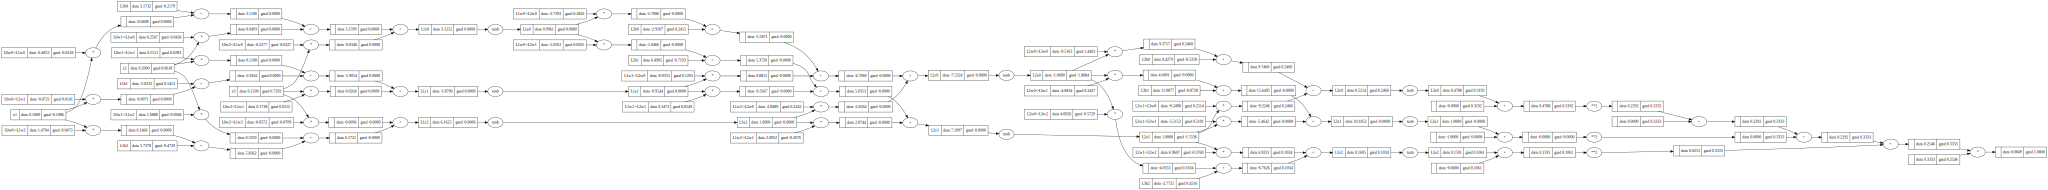

In [94]:
draw_dot(loss)
